In [84]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

# Context

In [85]:
#цель - определелить взаимосвязь переменных и выживаемости.
titanik_data = pd.read_csv('train.csv')
titanik_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [86]:
titanik_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


# Data quality assessment

In [87]:
#удаление дубликатов
titanik_data.drop_duplicates()
#удаление столбца 'Cabin', по причине большого числа пропущеных значений и столбца 'Ticket' по причине малоинформативности
clean_titanik_data = titanik_data.drop(columns = ['Cabin','Ticket'])
clean_titanik_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,27.14,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,13.35,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,71.29,S
3,3,0,3,"Kramer, James",male,19.00,0,0,13.04,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,7.76,S


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


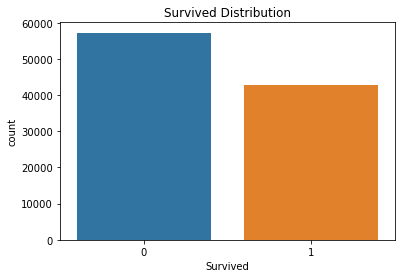

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


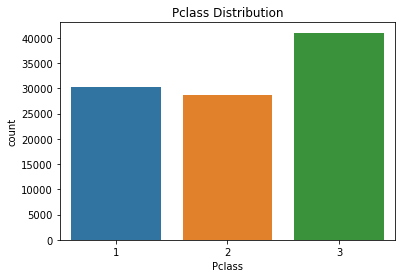

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


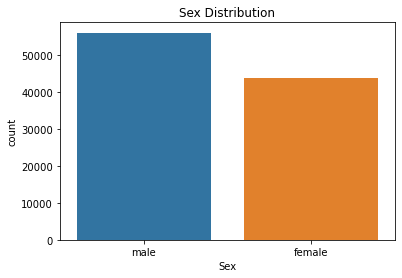

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


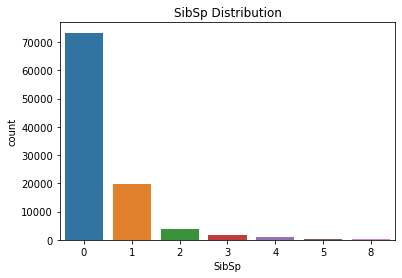

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


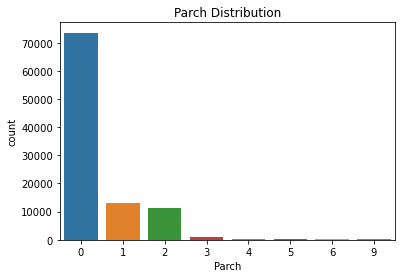

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


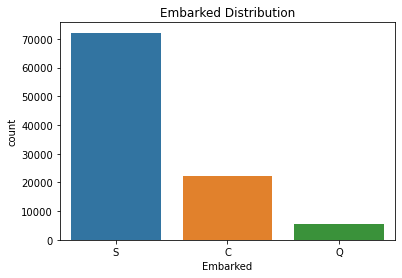

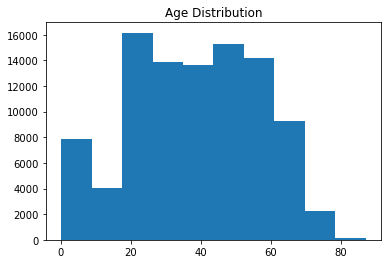

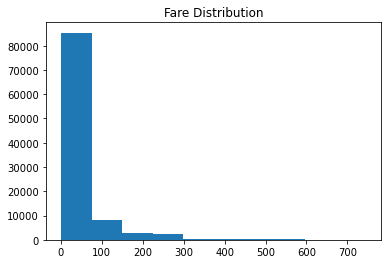

<Figure size 432x288 with 0 Axes>

In [88]:
#построение распрделений для каждой переменной для их оценки
column_list_count = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
column_list_continious = ['Age','Fare']

for column in column_list_count:
    sns.countplot(clean_titanik_data[column])
    plt.title(column + ' Distribution')
    plt.show()
    plt.clf()

for column in column_list_continious:
    plt.hist(clean_titanik_data[column])
    plt.title(column + ' Distribution')
    plt.show()
    plt.clf()

Text(0.5, 1.0, 'Correlation Heatmap')

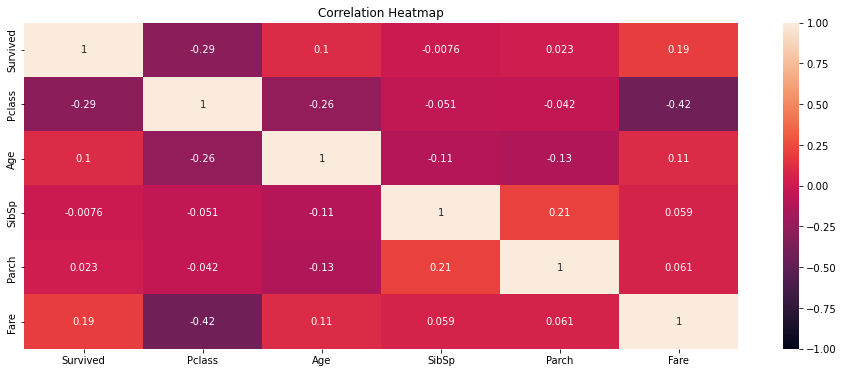

In [89]:
#построим карту линейных зависимостей на основе коэффициентов Пирсона
plt.figure(figsize=(16, 6))
sns.heatmap(clean_titanik_data.drop(columns = ['PassengerId']).corr(),vmin=-1, vmax=1, annot=True)
plt.title('Correlation Heatmap')

In [91]:
#заполнение пустых ячеек переменной 'Embarked' с объектным типом данных значением моды
embarked_mode = stats.mode(clean_titanik_data.Embarked)[0][0]
clean_titanik_data.Embarked = clean_titanik_data.Embarked.fillna(embarked_mode)
#переменная 'Fare' находится в набольшей связи с переменной 'Pclass'
#заполнение пустых ячеек 'Fare' переменной с числовым типом данных медианным значением в зависимости от класса каюты 'Pclass'
fare_mean_1class = clean_titanik_data[(clean_titanik_data.Pclass == 1)].Fare.mean()
fare_mean_2class = clean_titanik_data[(clean_titanik_data.Pclass == 2)].Fare.mean()
fare_mean_3class = clean_titanik_data[(clean_titanik_data.Pclass == 3)].Fare.mean()
clean_titanik_data.loc[clean_titanik_data.Pclass == 1,'Fare'] = clean_titanik_data[clean_titanik_data.Pclass == 1].Fare.fillna(fare_mean_1class)
clean_titanik_data.loc[clean_titanik_data.Pclass == 2,'Fare'] = clean_titanik_data[clean_titanik_data.Pclass == 2].Fare.fillna(fare_mean_2class)
clean_titanik_data.loc[clean_titanik_data.Pclass == 3,'Fare'] = clean_titanik_data[clean_titanik_data.Pclass == 3].Fare.fillna(fare_mean_3class)
#переменная 'Age' находится в набольшей связи с переменной 'Pclass'
#заполнение пустых ячеек 'Age' переменной с числовым типом данных медианным значением в зависимости от класса каюты 'Pclass'
age_mean_1class = clean_titanik_data[(clean_titanik_data.Pclass == 1)].Age.mean()
age_mean_2class = clean_titanik_data[(clean_titanik_data.Pclass == 2)].Age.mean()
age_mean_3class = clean_titanik_data[(clean_titanik_data.Pclass == 3)].Age.mean()
clean_titanik_data.loc[clean_titanik_data.Pclass == 1,'Age'] = clean_titanik_data[clean_titanik_data.Pclass == 1].Age.fillna(age_mean_1class)
clean_titanik_data.loc[clean_titanik_data.Pclass == 2,'Age'] = clean_titanik_data[clean_titanik_data.Pclass == 2].Age.fillna(age_mean_2class)
clean_titanik_data.loc[clean_titanik_data.Pclass == 3,'Age'] = clean_titanik_data[clean_titanik_data.Pclass == 3].Age.fillna(age_mean_3class)

clean_titanik_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          100000 non-null  float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Fare         100000 non-null  float64
 9   Embarked     100000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 7.6+ MB


# Data exploration

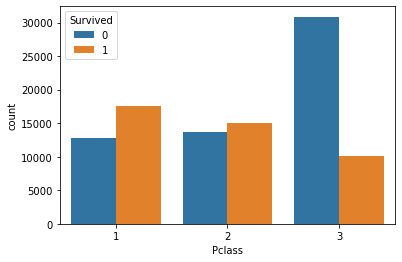

In [92]:
#рассмотрим зависимость выживаемости от каждой переменной (кроме 'Name')
# Survived/Pclass
sns.countplot(x="Pclass", hue="Survived",data = clean_titanik_data)
plt.show()
#можно заметить, что прослеживается зависимость выживаемости от класса каюты. 
#Это может обуславливаться расположнием кают в зависимости от класса.
#Чем ваше класс каюты, тем легче было выбраться на верх судна, нижние каюты затопило быстрее.


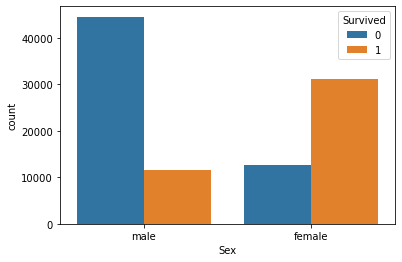

In [93]:
# Survived/Sex
sns.countplot(x="Sex", hue="Survived",data = clean_titanik_data)
plt.show()
#пол явно влияет на выживаемость, скорей всего мужчины помогали женщинам выбраться несмотря на угрозу своей жизни

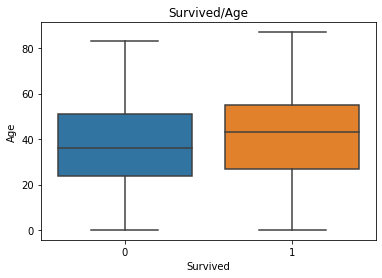

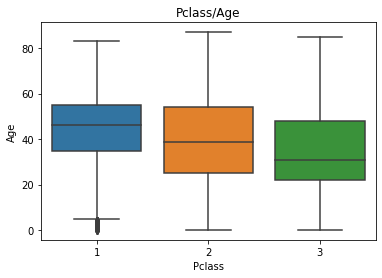

<Figure size 432x288 with 0 Axes>

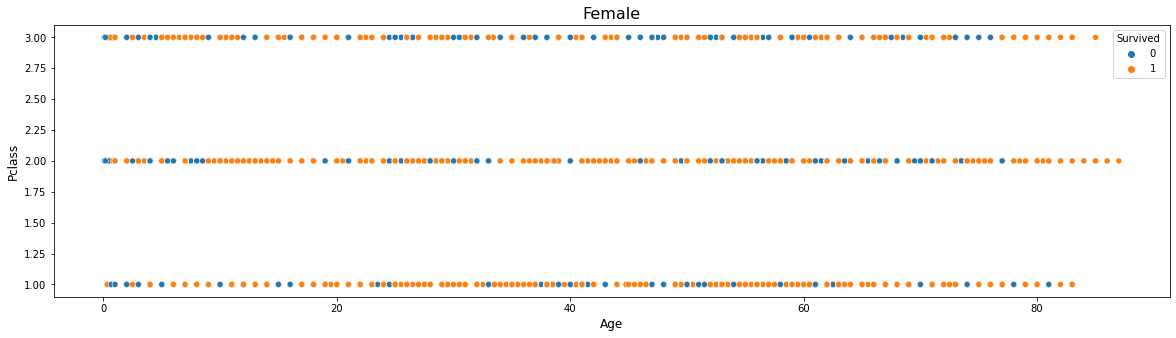

<Figure size 432x288 with 0 Axes>

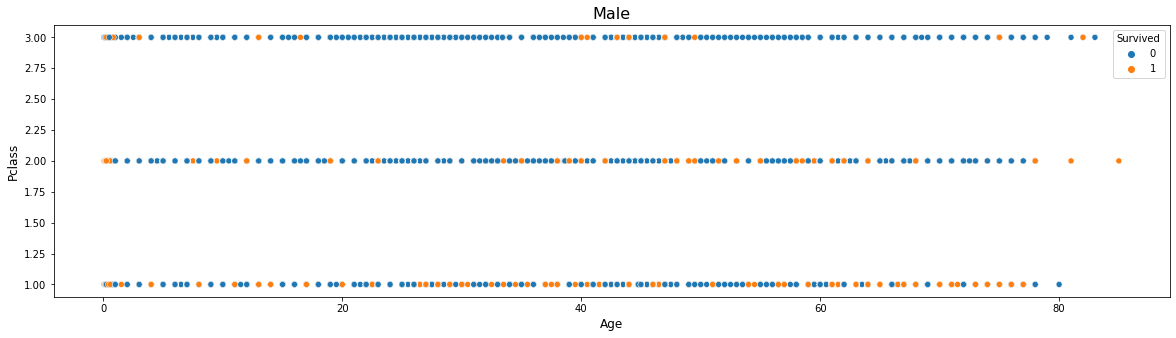

In [94]:
# Survived/Age
sns.boxplot(y="Age", x="Survived",data = clean_titanik_data)
plt.title('Survived/Age')
plt.show()
#прослеживается обратная связь, хотя я предпологала, что будет наоборот, потому что более молодым лечге будет выбраться.
#возможно чем старше человек, тем больше он располагает в средствах и мог себе позволить каюту классом выше
#построим график Pclass/Age
plt.clf()
sns.boxplot(y="Age", x="Pclass",data = clean_titanik_data)
plt.title('Pclass/Age')
plt.show()
#связь между классом каюты и возрастом прослеживается, чем старше пассажир, тем выше класс каюты
#построим диаграммы рассеяния Pclass/Age по признаку выживаемости, предварительно разделив их по половому признаку
#поскольку связь Survived/Sex достаточно сильная, а еще по причине удобочитаемости
plt.clf()
plt.figure(figsize=(20, 5))
plt.title('Female',size=16)
plt.xlabel('Age',size=12)
plt.ylabel('Pclass',size=12)
sns.scatterplot(data=clean_titanik_data[clean_titanik_data.Sex == "female"], x='Age', y='Pclass', hue='Survived')
plt.show()
plt.clf()
plt.figure(figsize=(20, 5))
plt.title('Male',size=16)
plt.xlabel('Age',size=12)
plt.ylabel('Pclass',size=12)
sns.scatterplot(data=clean_titanik_data[clean_titanik_data.Sex == "male"], x='Age', y='Pclass', hue='Survived')
plt.show()
#на основании этого можно сделать вывод, что выживаемость у мужчин очень сильно зависела от класса каюты в отличии от женщин
#так же для мужского пола влияет возраст. судя по графику, помогали спастись мледенцам, пожилым , а так же есть некая концентрация 
#спасшихся мужчин в районе 40 лет, полагаю по причине физических возможностей помочь слабым и также успеть позаботиться о себе

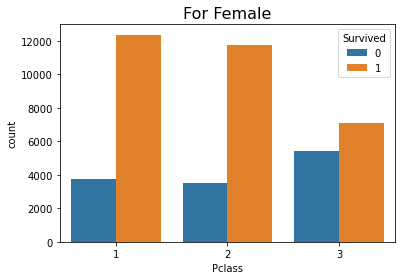

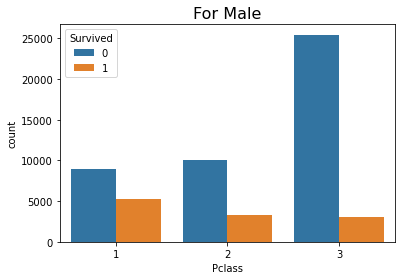

In [95]:
#построим графики выживаемости в зависимости от класса каюты по половому признаку
#построим график Pclass/Age for Female
plt.clf()
sns.countplot(x="Pclass", hue="Survived",data = clean_titanik_data[clean_titanik_data.Sex == "female"])
plt.title('For Female',size=16)
plt.show()
#построим график Pclass/Age for Male
plt.clf()
sns.countplot(x="Pclass", hue="Survived",data = clean_titanik_data[clean_titanik_data.Sex == "male"])
plt.title('For Male',size=16)
plt.show()



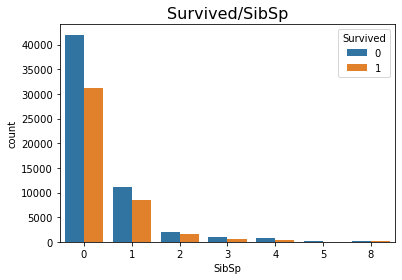

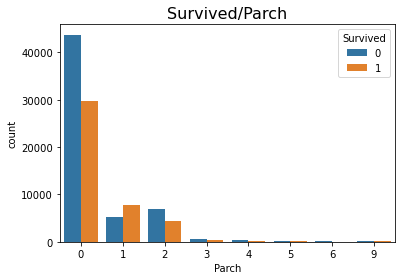

In [96]:
# Survived/SibSp
sns.countplot(x="SibSp", hue="Survived",data = clean_titanik_data)
plt.title('Survived/SibSp',size=16)
plt.show()
# Survived/Parch
sns.countplot(x="Parch", hue="Survived",data = clean_titanik_data)
plt.title('Survived/Parch',size=16)
plt.show()
#оба признака влияют на выживаемость. Его также можно объеденить, для облегчения исследования

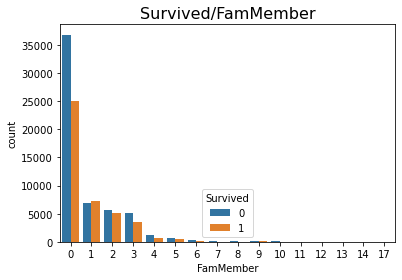

FamMember,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,17
Survived,,,,,,,,,,,,,,,,
0,0.595606,0.483746,0.517564,0.590806,0.664706,0.559655,0.674699,0.730769,0.747748,0.547771,0.585938,0.55,0.714286,0.8,1.0,0.5
1,0.404394,0.516254,0.482436,0.409194,0.335294,0.440345,0.325301,0.269231,0.252252,0.452229,0.414062,0.45,0.285714,0.2,0.0,0.5


In [97]:
clean_titanik_data['FamMember'] = clean_titanik_data['SibSp']+clean_titanik_data['Parch']
sns.countplot(x="FamMember", hue="Survived",data = clean_titanik_data)
plt.title('Survived/FamMember',size=16)
plt.show()
Survived_FamMember_freq = pd.crosstab(clean_titanik_data['Survived'],clean_titanik_data['FamMember'], normalize ='columns')
Survived_FamMember_freq
#можно сделать вывод , что выжить было легче тем у кого было 1 либо 2 родственника на борту

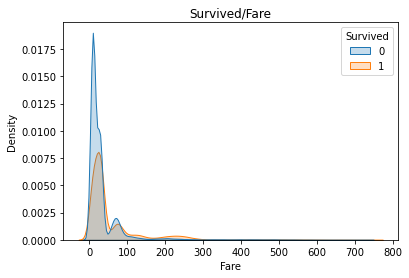

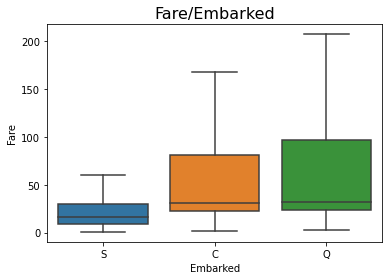

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


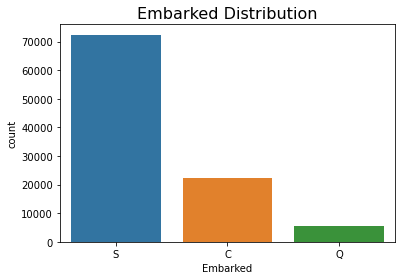

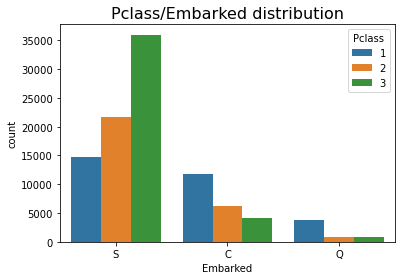

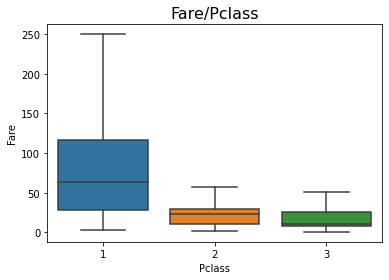

In [98]:
# Survived/Fare
sns.kdeplot(x="Fare", hue="Survived",data = clean_titanik_data,shade = True)
plt.title('Survived/Fare')
plt.show()
#график достаточно сложно интерпритировать, однако заметно ,что чем выше стоимость, тем меньше разрыв между количеством спасенных и не спасенных
#также график имеет очень много outliers(честно говоря, не могу вспомнить русское слово этого термина :)
#стоит рассмотреть зависисмость цены от класса каюты и от порта отправления
#также предполагаю,что цена могла зависить от даты продажи билета, однако мы не имеем таких данных
#Fare/Embarked
plt.clf()
plt.title('Fare/Embarked',size=16)
sns.boxplot(x="Embarked", y="Fare",data = clean_titanik_data,showfliers=False)
plt.show()
#связь прослеживается, однако обратная. Я предполагала, что чем большее растояние от порта до точки прибытия - тем дороже будет билет
#но билеты из Southampton оказались самые дешевые. Возможно причина в количестве проданных билетов из каждого порта.
#и их распределения по классу кают
sns.countplot(clean_titanik_data['Embarked'])
plt.title('Embarked Distribution',size=16)
plt.show()
plt.clf()
sns.countplot(x="Embarked", hue="Pclass",data = clean_titanik_data)
plt.title('Pclass/Embarked distribution',size=16)
plt.show()
#смотря на эти графики я предполагаю, что билеты вообще продовались по остаточному признаку. Сначала Southampton, потом Cherbourg и Queenstown
#также и каюты, вначале раскупились более дешевые каты в третьем классе, далее во втором и первом
#Fare/Pclass
plt.clf()
sns.boxplot(x="Pclass", y="Fare",data = clean_titanik_data,showfliers=False)
plt.title('Fare/Pclass',size=16)
plt.show()
#это достаточно понятная зависимость, которая подтвержается, чем выше класс каюты тем билет дороже

#рассматривать влияние цены билета на выживаемость достаточно сложно. На выживаемость в большей степени влияет класс каюты.
#который в свою очередь влияет на цену билета, однако к нему скорей всего приписывются и другие факторы, о которых нет упоминания.

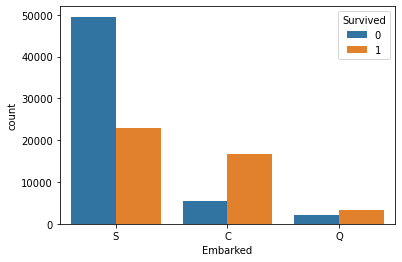

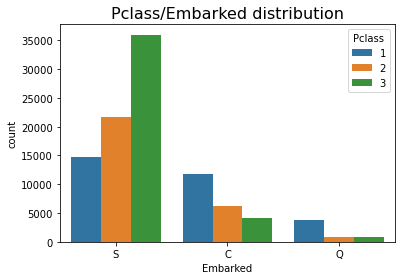

In [99]:
# Survived/Embarked
sns.countplot(x="Embarked", hue="Survived",data = clean_titanik_data)
plt.show()
#хоть количество выживших превалирует для порта Southampton, в процентном соотношении выживших гораздо больше отправлялось из Queenstown
#предполагаю это объясняется распредение по классам кают для каждого порта
plt.clf()
sns.countplot(x="Embarked", hue="Pclass",data = clean_titanik_data)
plt.title('Pclass/Embarked distribution',size=16)
plt.show()
# так как мы ранее уже выяснили, что класс каюты влияет на выживание. то глядя на распределние между классами кают и портами
# можно сказать, что порт отправления также влияет на выживаемость
#люди из Queenstown и Cherbourg приобретали билеты в каюты выше классом.

# Summary

Факторы которые в основной степени влияют на выживаемость на Титанике - это пол и класс каюты.
Так же прослеживается зависимость от количества членов семьи на борту(максимальная выживаемость наблюдается у людей имеющих 1-2 родственника на борту).
На выживаемость мужского пола так же влиял в некоторой степени возраст.
Есть зависимость между ценой билета и классом каюты,что совершенно очевидно.
Еще на выживаемость оказывает влияние порт отправлнения. Но предполагаю что распределние классов каюты по портам обусловлено какими то другими не известными нам здесь факторами.
переменная Ticket достаточно сложна в интерпритации, по крайне мере я не нашла для нее объяснения
переменная Cabin имеет около 70% пропущенных значений